# Классификация с помощью многослойного персептрона

---
### Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

---
### Данные

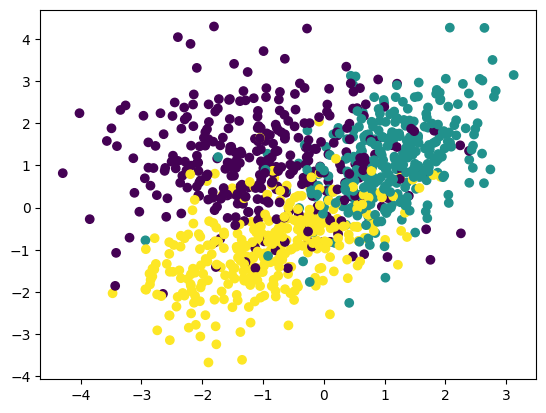

In [2]:
data, target = make_classification(n_classes = 3, n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=13)

target = target[:,np.newaxis]

plt.scatter(x=data[:,0], y=data[:,1], c=target.reshape(-1));

In [3]:
print(f'{data.shape}\n{target.shape}')

(1000, 2)
(1000, 1)


### Необходимые функции

In [4]:
def relu(z):
    return np.max(0, z)

In [5]:
def relu_deriv(Z):
    return Z > 0

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def sigmoid_deriv(Z):
    return (sigmoid(Z)*(1-sigmoid(Z))) #σ(x)⋅(1−σ(x))

In [8]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [9]:
def transform(Y):
    transform_Y = np.zeros((Y.size, Y.max() + 1))
    transform_Y[np.arange(Y.size), Y] = 1
    transform_Y = transform_Y.T
    return transform_Y

In [10]:
def gradient_descent(X, Y, W1, W2, alpha=0.03, iterations=1500, epsilon=1e-5):
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, W2, X)
        dW1, dW2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, W2 = update_params(W1, W2, dW1, dW2, alpha)
    return W1, W2

In [11]:
'''
def rounds(X):
    res = []
    for x in X[0]:
        if x > 0.75:
            res.append(1.0)
        else:
            res.append(0.0)
    return res
''';

In [12]:
'''
def cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5
    return (1/m)*((np.dot((-y).T, np.log(h + epsilon))-(np.dot((1-y).T, np.log(1-h + epsilon)))))
''';

### Цикл обучения

In [13]:
def forward_prop(W1, W2, X):
    Z1 = np.dot(W1, X)
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(W2, A1)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [14]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - transform(Y.reshape(1, len(Y)))
    dW2 = 1/m * np.dot(dZ2, A1.T)
    
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_deriv(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    return dW1, dW2

In [15]:
def update_params(W1, W2, dW1, dW2, alpha):
    W1 = W1 - alpha * dW1   
    W2 = W2 - alpha * dW2    
    return W1, W2

In [16]:
def classify(A2):
    return np.argmax(A2, 0)

In [17]:
def predict(X, W1, W2):
    Z1, A1, Z2, A2 = forward_prop(W1, W2, X)
    pred = classify(A2)
    print(A2.shape)
    return pred

### Тестирование

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.8)

print(f'{x_train.shape}, {y_train.shape}\n{x_test.shape}, {y_test.shape}')

(800, 2), (800, 1)
(200, 2), (200, 1)


In [19]:
Y = y_train
m = len(Y)

X = np.hstack((np.ones((m, 1)), x_train)).T

n = np.size(X, 1)
W1 = np.random.rand(10, 3)
W2 = np.random.rand(3, 10)

'''
print(f'{W1}\n\n{W2}\n')

print(n)
print(W1.shape)
print(W2.shape)
'''

print(X.shape)
print(Y.shape)

alpha = 0.03

(3, 800)
(800, 1)


In [20]:
W1, W2 = gradient_descent(X, Y, W1, W2)

In [21]:
'''
print(f'{W1}\n\n{W2}')
''';

In [22]:
m_test = len(y_test)

x_test = np.hstack((np.ones((m_test, 1)), x_test)).T
print(x_test.shape)

(3, 200)


In [23]:
y_pred = predict(x_test, W1, W2)

(3, 200)


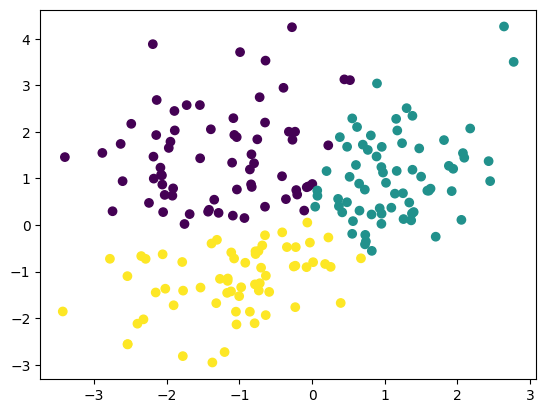

In [24]:
plt.scatter(x=x_test.T[:,1], y=x_test.T[:,2], c=np.array(y_pred).reshape(-1));

In [25]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        78
           1       0.67      0.84      0.74        55
           2       0.87      0.82      0.85        67

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.81      0.80      0.80       200

